<a href="https://colab.research.google.com/github/SanaAlotaibi/DataScienceProject/blob/main/IT362_phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset Information

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Columns you want to keep
columns_to_keep = [
    "name", "owner", "url", "description", "stars", "forks",
    "created_at", "pushed_at", "primary_language", "all_languages_bytes",
    "topics", "contributors_count"
]

# Load the dataset and select specified columns
df = pd.read_csv('collectedData.csv')[columns_to_keep]


# === BASIC INFO ===
attribute_informations = pd.DataFrame({
    'AttributeName' : df.columns,
    'DataType' : df.dtypes.values
})

print(f"Number of attributes: {len(df.columns)}")
print(f"Number of objects: {len(df)}")
print("\nAttributes and Their Types:")
print(attribute_informations)

Number of attributes: 12
Number of objects: 5751

Attributes and Their Types:
          AttributeName DataType
0                  name   object
1                 owner   object
2                   url   object
3           description   object
4                 stars   object
5                 forks   object
6            created_at   object
7             pushed_at   object
8      primary_language   object
9   all_languages_bytes   object
10               topics   object
11   contributors_count   object


/tmp/ipython-input-2741941259.py:14: DtypeWarning: Columns (4,5,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,2

#Dataset Quality Check

In [13]:
# === DATA QUALITY CHECK ===
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

# Clean dataset
df_cleaned = df.dropna(subset=['primary_language']).drop_duplicates()

print("\nOriginal DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)

df_cleaned.to_csv('CleanedDataset.csv', index=False)


Missing values per column:
name                      0
owner                     0
url                       0
description             115
stars                     3
forks                     4
created_at                3
pushed_at                 5
primary_language        642
all_languages_bytes       5
topics                 1099
contributors_count        5
dtype: int64

Number of duplicate rows:
0

Original DataFrame shape: (5751, 12)
Cleaned DataFrame shape: (5109, 12)


We decieded to remove rows with missing “Primary programming language” value only.

#Transforming

In [14]:
# === DESCRIPTIVE STATISTICS ===
# Convert 'stars' and 'forks' columns to numeric, coercing errors
df_cleaned['stars'] = pd.to_numeric(df_cleaned['stars'], errors='coerce')
df_cleaned['forks'] = pd.to_numeric(df_cleaned['forks'], errors='coerce')


print("\nSummary statistics for numeric columns:")
print(df_cleaned.describe())

print("\nTop 10 most common programming languages:")
print(df_cleaned['primary_language'].value_counts().head(10))


Summary statistics for numeric columns:
               stars         forks
count    5106.000000   5106.000000
mean     3612.516255    521.742068
std     10330.101442   2242.953026
min        94.000000      0.000000
25%       330.000000     43.000000
50%       700.000000     98.000000
75%      1987.250000    275.000000
max    178659.000000  60974.000000

Top 10 most common programming languages:
primary_language
Python              2254
TypeScript           726
Jupyter Notebook     722
JavaScript           236
C++                  176
Go                   140
Rust                 139
Java                 101
HTML                  84
C#                    67
Name: count, dtype: int64


#Visualiziation

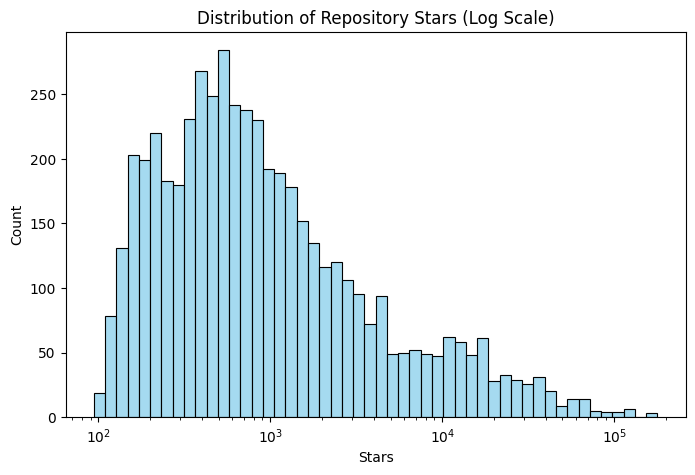

In [16]:
# === VISUALIZATIONS ===
# 1. Distribution of repository stars
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['stars'].dropna(), bins=50, log_scale=True, color='skyblue')
plt.title("Distribution of Repository Stars (Log Scale)")
plt.xlabel("Stars")
plt.ylabel("Count")
plt.show()

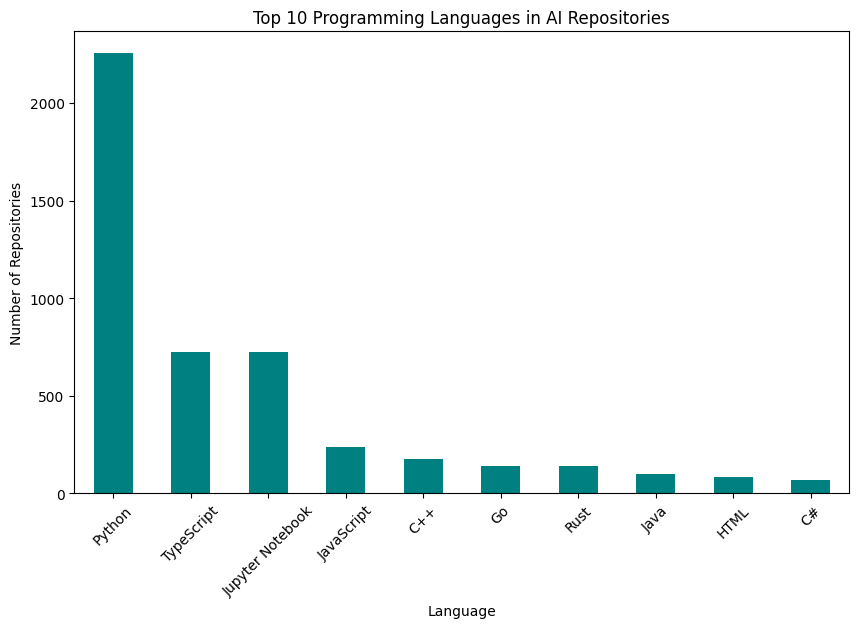

In [17]:
# 2. Top 10 programming languages used
plt.figure(figsize=(10,6))
df_cleaned['primary_language'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Programming Languages in AI Repositories")
plt.xlabel("Language")
plt.ylabel("Number of Repositories")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-2836031491.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_cleaned['created_at'].dt.to_period("M").value_counts().sort_index().plot(kind='line')


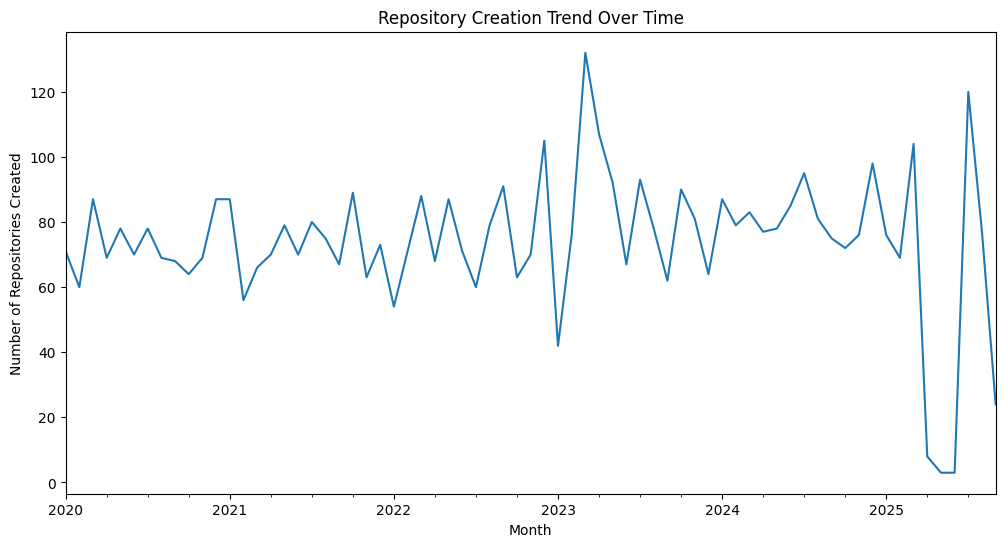

In [18]:
# 3. Repositories created over time
df_cleaned['created_at'] = pd.to_datetime(df_cleaned['created_at'], errors='coerce')
plt.figure(figsize=(12,6))
df_cleaned['created_at'].dt.to_period("M").value_counts().sort_index().plot(kind='line')
plt.title("Repository Creation Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Repositories Created")
plt.show()

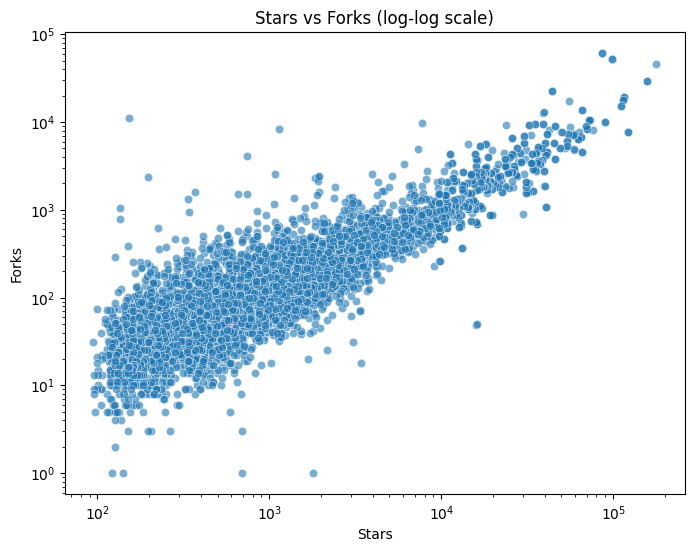

In [19]:
# 4. Stars vs Forks scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cleaned.dropna(subset=['stars', 'forks']), x='stars', y='forks', alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.title("Stars vs Forks (log-log scale)")
plt.xlabel("Stars")
plt.ylabel("Forks")
plt.show()